<a href="https://colab.research.google.com/github/linyubo/CE888code/blob/main/assginment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download econml

In [ ]:
!pip install econml

Import libaries

In [ ]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# for k-fold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget https://github.com/dmachlanski/CE888_2022/raw/main/project/data/ihdp.npz
!wget https://github.com/dmachlanski/CE888_2022/raw/main/project/data/jobs.npz

--2022-04-25 17:58:19--  https://github.com/dmachlanski/CE888_2022/raw/main/project/data/ihdp.npz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.npz [following]
--2022-04-25 17:58:19--  https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174506 (170K) [application/octet-stream]
Saving to: ‘ihdp.npz’

ihdp.npz            100%[===================>] 170.42K  --.-KB/s    in 0.02s   

2022-04-25 17:58:19 (7.07 MB/s) - ‘ihdp.npz’ saved [174506/174506]

--2022-04-25 17:58:19-- 

In [ ]:
ihdp = np.load('ihdp.npz')
jobs = np.load('jobs.npz')

In [ ]:
ihdp.files

['x', 't', 'yf', 'ycf', 'ite']

In [ ]:
for f in ihdp.files:
  print(f'{f}: {ihdp[f].shape}')

x: (747, 25)
t: (747, 1)
yf: (747, 1)
ycf: (747, 1)
ite: (747, 1)


In [ ]:
ihdp['x']

array([[ 1.39739503,  0.99634625, -1.10562395, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26903265,  0.19681812,  0.38382797, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05153683,  1.79587438, -1.10562395, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.04522851, -1.33727611,  1.12855393, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11573459, -0.60271001, -1.10562395, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.41901117,  1.39611031, -0.73326097, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
ihdp['x'][0]

array([ 1.39739503,  0.99634625, -1.10562395, -0.87960599,  0.30856884,
       -1.02340239,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [ ]:
jobs.files

['x', 't', 'y', 'e']

In [ ]:
for f in jobs.files:
  print(f'{f}: {jobs[f].shape}')

x: (3212, 17)
t: (3212, 1)
y: (3212, 1)
e: (3212, 1)


In [ ]:
for i in range(6):
  print(np.mean(jobs['x'][:,i]))

2.013056941287955e-16
-1.880327912192046e-16
0.3742216687422167
0.04887920298879203
0.7079701120797012
0.411892901618929


In [ ]:
x_ihdp_flat = ihdp['x'].reshape(-1,1)
x_ihdp = ihdp['x']
t_ihdp = ihdp['t'].reshape(-1,1)
yf_ihdp = ihdp['yf'].reshape(-1,1)
ycf_ihdp = ihdp['ycf'].reshape(-1,1)
ite_ihdp = ihdp['ite']

In [ ]:
nan_ihdp = np.isnan(ihdp['x'])
nan_ihdp.any()

False

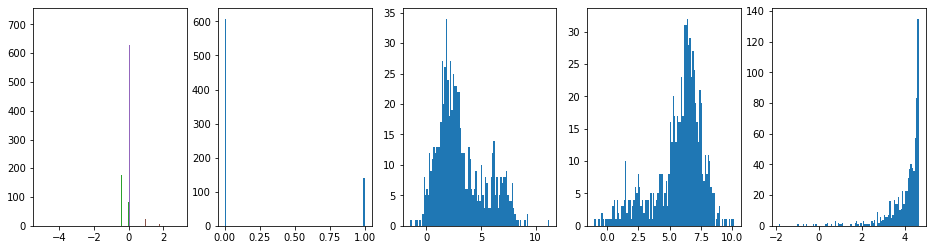

In [ ]:
bins=100
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
axs[0].hist(x_ihdp, bins=bins)
axs[1].hist(t_ihdp, bins=bins)
axs[2].hist(yf_ihdp, bins=bins)
axs[3].hist(ycf_ihdp, bins=bins)
axs[4].hist(ite_ihdp, bins=bins)
plt.show()

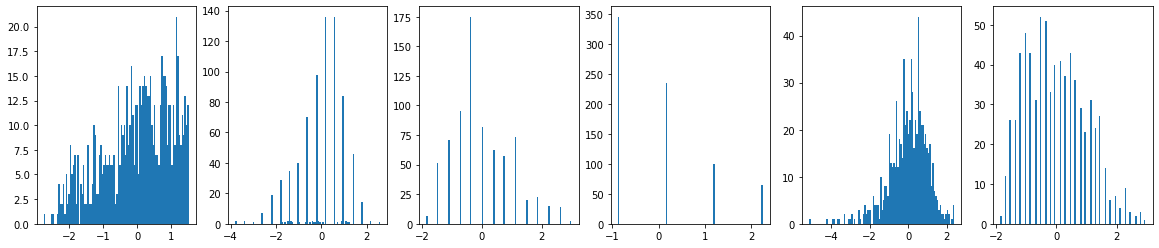

In [ ]:
bins=100
fig, axs = plt.subplots(1, 6, figsize=(20, 4))
axs[0].hist(x_ihdp[:,0], bins=bins)
axs[1].hist(x_ihdp[:,1], bins=bins)
axs[2].hist(x_ihdp[:,2], bins=bins)
axs[3].hist(x_ihdp[:,3], bins=bins)
axs[4].hist(x_ihdp[:,4], bins=bins)
axs[5].hist(x_ihdp[:,5], bins=bins)
plt.show()

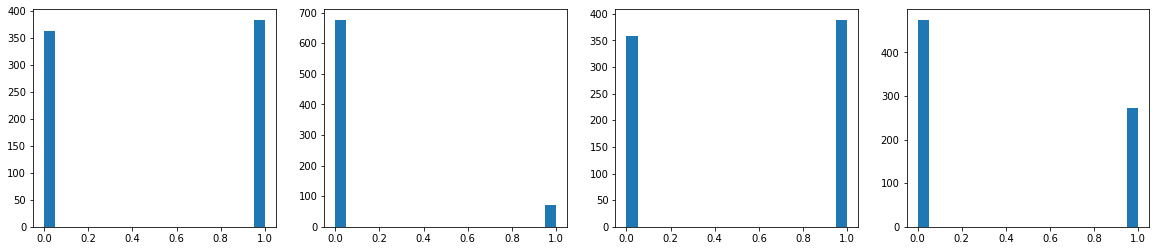

In [ ]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
axs[0].hist(x_ihdp[:,6], bins=bins)
axs[1].hist(x_ihdp[:,7], bins=bins)
axs[2].hist(x_ihdp[:,8], bins=bins)
axs[3].hist(x_ihdp[:,9], bins=bins)
plt.show()

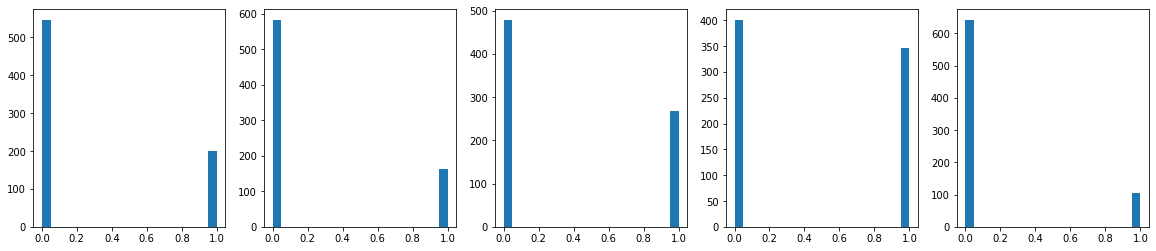

In [ ]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_ihdp[:,10], bins=bins)
axs[1].hist(x_ihdp[:,11], bins=bins)
axs[2].hist(x_ihdp[:,12], bins=bins)
axs[3].hist(x_ihdp[:,13], bins=bins)
axs[4].hist(x_ihdp[:,14], bins=bins)
plt.show()

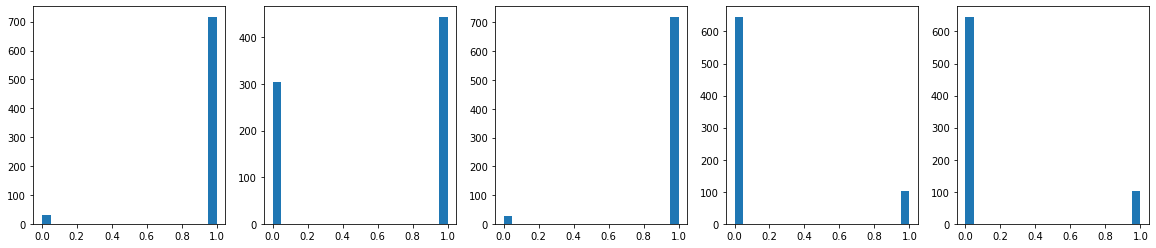

In [ ]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_ihdp[:,15], bins=bins)
axs[1].hist(x_ihdp[:,16], bins=bins)
axs[2].hist(x_ihdp[:,17], bins=bins)
axs[3].hist(x_ihdp[:,18], bins=bins)
axs[4].hist(x_ihdp[:,19], bins=bins)
plt.show()

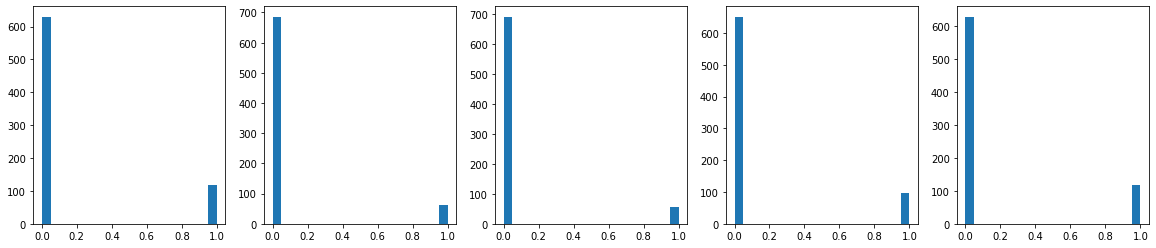

In [ ]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_ihdp[:,20], bins=bins)
axs[1].hist(x_ihdp[:,21], bins=bins)
axs[2].hist(x_ihdp[:,22], bins=bins)
axs[3].hist(x_ihdp[:,23], bins=bins)
axs[4].hist(x_ihdp[:,24], bins=bins)
plt.show()

In [ ]:
x_jobs_flat = jobs['x'].reshape(-1,1)
x_jobs = jobs['x']
t_jobs = jobs['t'].reshape(-1,1)
y_jobs = jobs['y'].reshape(-1,1)
e_jobs = jobs['e'].reshape(-1,1)

In [ ]:
jobs['x'][0]

array([-0.61428209,  1.46472657,  0.        ,  0.        ,  1.        ,
        0.        ,  2.39325   ,  2.74619647, -0.65331121, -0.65691271,
        1.62753104,  2.46233663,  2.93724407,  0.        ,  0.        ,
        2.84390896,  0.        ])

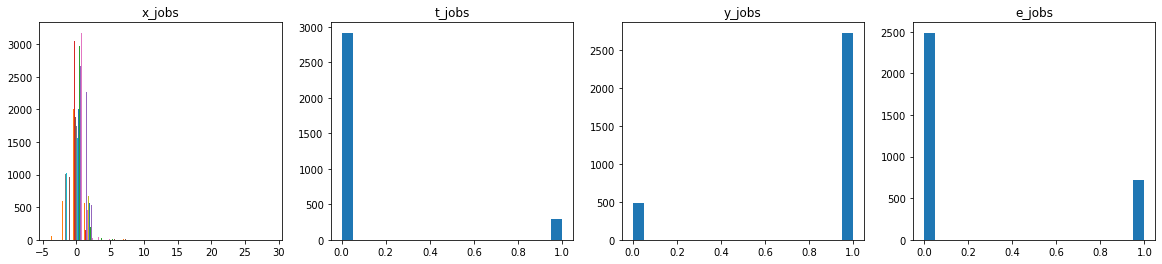

In [ ]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
axs[0].hist(x_jobs, bins=bins)
axs[0].set_title('x_jobs')
axs[1].hist(t_jobs, bins=bins)
axs[1].set_title('t_jobs')
axs[2].hist(y_jobs, bins=bins)
axs[2].set_title('y_jobs')
axs[3].hist(e_jobs, bins=bins)
axs[3].set_title('e_jobs')
plt.show()

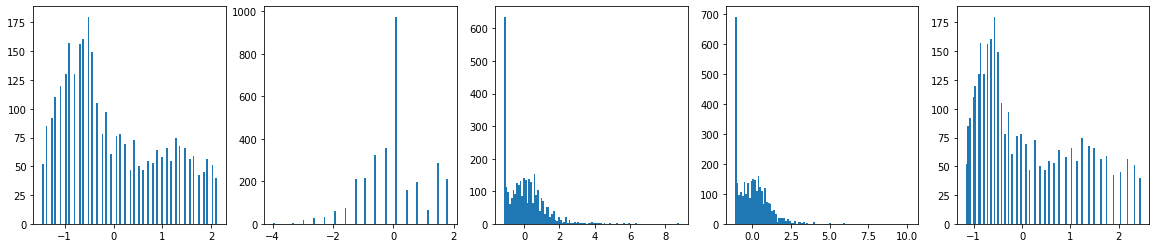

In [ ]:
bins=100
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_jobs[:,0], bins=bins)
axs[1].hist(x_jobs[:,1], bins=bins)
axs[2].hist(x_jobs[:,6], bins=bins)
axs[3].hist(x_jobs[:,7], bins=bins)
axs[4].hist(x_jobs[:,8], bins=bins)
plt.show()

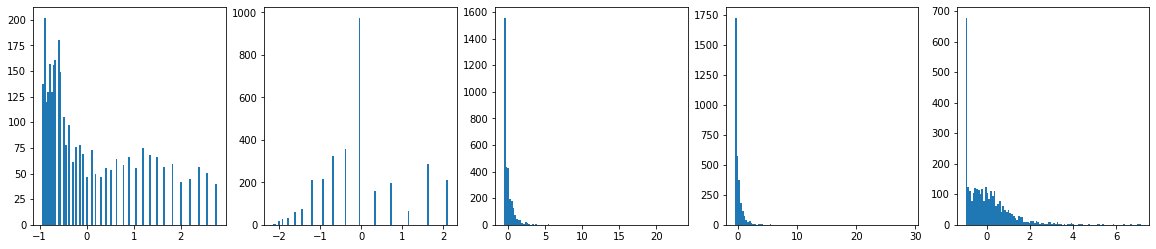

In [ ]:
bins=100
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_jobs[:,9], bins=bins)
axs[1].hist(x_jobs[:,10], bins=bins)
axs[2].hist(x_jobs[:,11], bins=bins)
axs[3].hist(x_jobs[:,12], bins=bins)
axs[4].hist(x_jobs[:,15], bins=bins)
plt.show()

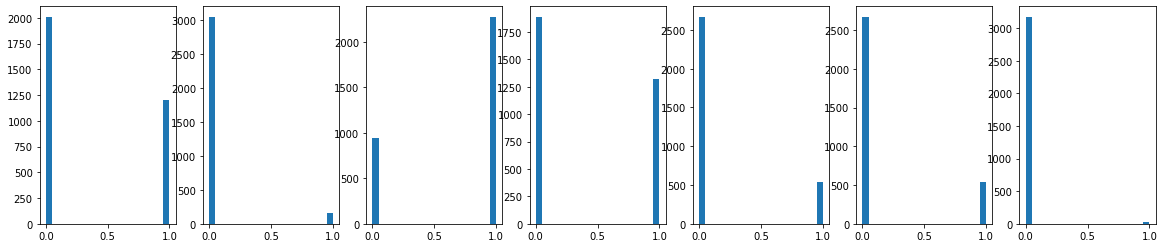

In [ ]:
bins=20
fig, axs = plt.subplots(1, 7, figsize=(20, 4))
axs[0].hist(x_jobs[:,2], bins=bins)
axs[1].hist(x_jobs[:,3], bins=bins)
axs[2].hist(x_jobs[:,4], bins=bins)
axs[3].hist(x_jobs[:,5], bins=bins)
axs[4].hist(x_jobs[:,13], bins=bins)
axs[5].hist(x_jobs[:,14], bins=bins)
axs[6].hist(x_jobs[:,16], bins=bins)
plt.show()

In [ ]:
nan_jobs=np.isnan(jobs['x'])
nan_jobs.any()

False

In [ ]:
def abs_ate(effect_true, effect_pred):
    """
    Absolute error for the Average Treatment Effect (ATE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: absolute error on ATE
    """
    
    ate = np.abs(np.mean(effect_true)-np.mean(effect_pred))
    return ate
    

def pehe(effect_true, effect_pred):
    """
    Precision in Estimating the Heterogeneous Treatment Effect (PEHE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: PEHE
    """
    
    a = np.sqrt(np.mean((effect_true-effect_pred)**2))
    return a

In [ ]:
x_jobs_train, x_jobs_test, t_jobs_train, t_jobs_test, y_jobs_train, y_jobs_test, e_jobs_train, e_jobs_test = train_test_split(jobs['x'], t_jobs, y_jobs, e_jobs, test_size=0.2)

scaler_x = StandardScaler()
x_jobs_train = scaler_x.fit_transform(x_jobs_train)
x_jobs_test = scaler_x.transform(x_jobs_test)

Random Forest

In [ ]:
# Random Forest with default parameters.
rf = RandomForestRegressor()

# Train on the training data.
# In the supervised setting, our usual X here consists of X and T.
# The target is Y - the outcome.
# Input: [X, T], output: Y.
# Hint: use np.concatenate or np.hstack functions to merge X and T.
xte_jobs = np.concatenate([x_jobs,t_jobs,e_jobs],axis=1)

xte_jobs_train = np.concatenate([x_jobs_train,t_jobs_train,e_jobs_train],axis=1)
xte_jobs_test = np.concatenate([x_jobs_test,t_jobs_test,e_jobs_test],axis=1)

rf.fit(xte_jobs_train,y_jobs_train.flatten())

# Predictions
# Note we set T to a specific value for ALL individuals.
# These are interventional distributions - P(Y|X, do(T=t)).

# Predict Y_0 given [X, 0]
# Hint: use np.zeros_like or np.zeros functions to get the zeros for all units.
# Hint 2: you still have to merge X and zeros (see training above).
xte0_jobs_test =  np.concatenate([x_jobs_test,np.zeros((643,1)),e_jobs_test],axis=1)

rf_y0_jobs_test = rf.predict(xte0_jobs_test)

# Predict Y_1 given [X, 1]
# Hint: use np.ones_like or np.ones functions to get the ones for all units.
# Hint 2: you still have to merge X and ones (see training above).
xte1_jobs_test = np.concatenate([x_jobs_test,np.ones((643,1)),e_jobs_test],axis=1)

rf_y1_jobs_test = rf.predict(xte1_jobs_test)

# Compute ITEs
# ITE = Y_1 - Y_0
rf_te_jobs_test = rf_y1_jobs_test - rf_y0_jobs_test


In [ ]:
np.mean(rf_te_jobs_test)

In [ ]:
rf_disc = {
    'n_estimators' : [100,150,200,250,300]
}

In [ ]:
rf_best = GridSearchCV(RandomForestRegressor(),param_grid=rf_disc)
rf_best.fit(xte_jobs_train,y_jobs_train.flatten())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
sorted(rf_best.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
rf_best.cv_results_

{'mean_fit_time': array([0.84642549, 1.26573443, 1.66160388, 2.06588273, 2.48472986]),
 'mean_score_time': array([0.01671214, 0.02298212, 0.03056011, 0.03647757, 0.04503722]),
 'mean_test_score': array([0.21135287, 0.21292161, 0.21639125, 0.21909794, 0.21275416]),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250, 300],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250},
  {'n_estimators': 300}],
 'rank_test_score': array([5, 3, 2, 1, 4], dtype=int32),
 'split0_test_score': array([0.21565419, 0.21372623, 0.21742486, 0.21908174, 0.21126141]),
 'split1_test_score': array([0.11436949, 0.1255914 , 0.12732846, 0.12632512, 0.11864471]),
 'split2_test_score': array([0.28138998, 0.28881814, 0.28061468, 0.29302491, 0.28964541]),
 'split3_test_score': array([0.21175305, 0.20501842, 0.2160545 , 0.213259  , 0.20799554]),
 '

In [ ]:
strtfdKFold = StratifiedKFold(n_splits=10)
pipeline = make_pipeline(RandomForestRegressor(n_estimators=200))
kfold = strtfdKFold.split(x_jobs, y_jobs)
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_jobs[train], y_jobs[train].flatten())
    score = pipeline.score(x_jobs[test], y_jobs[test].flatten())
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_jobs[test].flatten()), score))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [ 49 273], Accuracy: 0.178
Fold:  2, Training/Test Split Distribution: [ 49 273], Accuracy: 0.272
Fold:  3, Training/Test Split Distribution: [ 48 273], Accuracy: 0.224
Fold:  4, Training/Test Split Distribution: [ 48 273], Accuracy: 0.249
Fold:  5, Training/Test Split Distribution: [ 48 273], Accuracy: 0.181
Fold:  6, Training/Test Split Distribution: [ 48 273], Accuracy: 0.088
Fold:  7, Training/Test Split Distribution: [ 48 273], Accuracy: 0.165
Fold:  8, Training/Test Split Distribution: [ 48 273], Accuracy: 0.234
Fold:  9, Training/Test Split Distribution: [ 48 273], Accuracy: 0.277
Fold: 10, Training/Test Split Distribution: [ 48 273], Accuracy: 0.226


Cross-Validation accuracy: 0.209 +/- 0.054


IPW

In [ ]:
def get_ps_weights(clf, x, t):
  ti = np.squeeze(t)
  clf.fit(x, ti)
  ptx = clf.predict_proba(x).T[1].T + 0.0001 # add a small value to avoid dividing by 0
  # Given ti and ptx values, compute the weights wi (see formula above):
  wi = (ti/ptx) + (1-ti)/(1-ptx)

  return wi

Functions

In [ ]:
def abs_att(effect_pred, yf, t, e):
    """
    Absolute error for the Average Treatment Effect on the Treated
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: absolute error on ATT
    """
    att_true = np.mean(yf[t > 0]) - np.mean(yf[(1 - t + e) > 1])
    att_pred = np.mean(effect_pred[(t + e) > 1])

    return np.abs(att_pred - att_true)

def policy_risk(effect_pred, yf, t, e):
    """
    Computes the risk of the policy defined by predicted effect
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: policy risk
    """
    # Consider only the cases for which we have experimental data (i.e., e > 0)
    t_e = t[e > 0]
    yf_e = yf[e > 0]
    effect_pred_e = effect_pred[e > 0]

    if np.any(np.isnan(effect_pred_e)):
        return np.nan

    policy = effect_pred_e > 0.0
    treat_overlap = (policy == t_e) * (t_e > 0)
    control_overlap = (policy == t_e) * (t_e < 1)

    if np.sum(treat_overlap) == 0:
        treat_value = 0
    else:
        treat_value = np.mean(yf_e[treat_overlap])

    if np.sum(control_overlap) == 0:
        control_value = 0
    else:
        control_value = np.mean(yf_e[control_overlap])

    pit = np.mean(policy)
    policy_value = pit * treat_value + (1.0 - pit) * control_value

    return 1.0 - policy_value
def abs_ate(effect_true, effect_pred):
    # 1. Obtain true ATE by getting the mean of true ITEs.
    # 2. Obtain predicted ATE by getting the mean of predicted ITEs.
    # 3. Calculate the difference between the true and predicted ATEs.
    # 4. Calculate the absolute value of the difference obtained in the previous step.
    # Hint: Keep your code concise (this can be done in one line of code).
    ## Your code goes here
    a = np.abs(np.mean(effect_true) - np.mean(effect_pred))
    return a
def pehe(effect_true, effect_pred):
    # 1. Obtain the difference between the true and predicted ITEs.
    # 2. Square the result (power of 2).
    # 3. Take the mean.
    # 4. Take the square root.
    # Hint: Keep your code concise (this can be done in one line of code).
    ## Your code goes here
    a = np.sqrt(np.mean((effect_true-effect_pred)**2))
    return a

In [ ]:
# Get the sample weights
prop_clf = RandomForestClassifier()
weights = get_ps_weights(prop_clf, x_jobs_train, t_jobs_train)

# Train the regressor
rf_ipsw = RandomForestRegressor()

rf_ipsw.fit(xte_jobs_train, y_jobs_train.flatten())

xte0_jobs_train = np.concatenate([x_jobs_train,np.zeros((2569,1)),e_jobs_train],axis=1)
xte1_jobs_train = np.concatenate([x_jobs_train,np.ones((2569,1)),e_jobs_train],axis=1)
# Make predictions
rf_ipsw_y0_test = rf_ipsw.predict(xte0_jobs_test)
rf_ipsw_y1_test = rf_ipsw.predict(xte1_jobs_test)

# Compute ITEs
rf_ipsw_te_test = rf_ipsw_y1_test - rf_ipsw_y0_test

In [ ]:
# X-Learner
xl_jobs = XLearner(models=RandomForestRegressor(), propensity_model=RandomForestClassifier())
xl_jobs.fit(y_jobs_train, t_jobs_train.flatten(), X=x_jobs_train)

xl_jobs_te_test = xl_jobs.effect(x_jobs_test)
print(xl_jobs.ate(x_jobs_test))

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


[0.06580875]


In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xte_jobs_train,y_jobs_train)
reg.predict(xte_jobs_test)
print(reg.score(xte_jobs_test,y_jobs_test))

0.2001738694485089


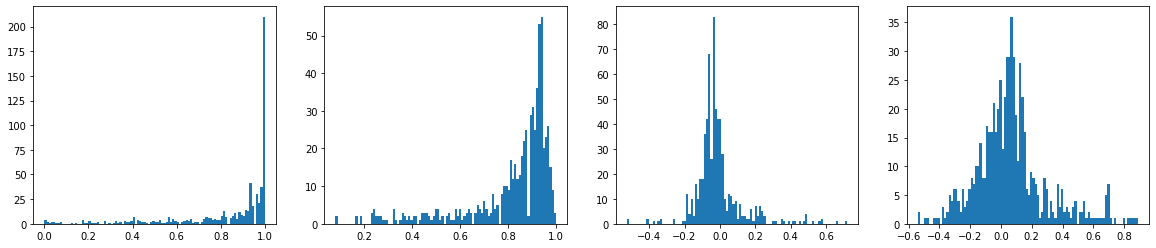

In [ ]:
bins=100
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
axs[0].hist(rf_ipsw_y0_test, bins=bins)
axs[1].hist(rf_ipsw_y1_test, bins=bins)
axs[2].hist(rf_ipsw_te_test, bins=bins)
axs[3].hist(xl_jobs_te_test, bins=bins)
plt.show()

In [ ]:
rf_ipsw_best = GridSearchCV(RandomForestRegressor(),param_grid=rf_disc)
rf_ipsw_best.fit(xte_jobs_train,y_jobs_train.flatten())
rf_ipsw_best.cv_results_

{'mean_fit_time': array([0.9467761 , 1.24290524, 1.67029247, 2.07366786, 2.47031555]),
 'mean_score_time': array([0.01739049, 0.02253509, 0.02952213, 0.03612952, 0.04720683]),
 'mean_test_score': array([0.20814475, 0.21139614, 0.21090762, 0.21416497, 0.21590426]),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250, 300],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250},
  {'n_estimators': 300}],
 'rank_test_score': array([5, 3, 4, 2, 1], dtype=int32),
 'split0_test_score': array([0.2269856 , 0.22582012, 0.21230813, 0.21232539, 0.21520895]),
 'split1_test_score': array([0.10832385, 0.11054964, 0.12242545, 0.1207358 , 0.12501203]),
 'split2_test_score': array([0.27930124, 0.28441868, 0.27999878, 0.28273908, 0.29339267]),
 'split3_test_score': array([0.20166188, 0.20246498, 0.21009227, 0.20818659, 0.21114216]),
 '

In [ ]:
strtfdKFold = StratifiedKFold(n_splits=10)
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
kfold = strtfdKFold.split(xte_jobs, y_jobs.flatten())
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(xte_jobs[train], y_jobs[train].flatten())
    score = pipeline.score(xte_jobs[test], y_jobs[test].flatten())
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_jobs[test].flatten()), score))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [ 49 273], Accuracy: 0.882
Fold:  2, Training/Test Split Distribution: [ 49 273], Accuracy: 0.879
Fold:  3, Training/Test Split Distribution: [ 48 273], Accuracy: 0.882
Fold:  4, Training/Test Split Distribution: [ 48 273], Accuracy: 0.891
Fold:  5, Training/Test Split Distribution: [ 48 273], Accuracy: 0.875
Fold:  6, Training/Test Split Distribution: [ 48 273], Accuracy: 0.860
Fold:  7, Training/Test Split Distribution: [ 48 273], Accuracy: 0.888
Fold:  8, Training/Test Split Distribution: [ 48 273], Accuracy: 0.891
Fold:  9, Training/Test Split Distribution: [ 48 273], Accuracy: 0.910
Fold: 10, Training/Test Split Distribution: [ 48 273], Accuracy: 0.869


Cross-Validation accuracy: 0.883 +/- 0.013


CausalForestDML

In [ ]:
from econml.dml import CausalForestDML
est = CausalForestDML(model_y='auto',model_t='auto',cv=4)
est.fit(y_jobs.flatten(), t_jobs, X=x_jobs ,W=e_jobs)
print(est.ate(X=x_jobs))
print(est.score(y_jobs.flatten(), t_jobs, X=x_jobs ,W=e_jobs))#MSE on data

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
Objective did not converge. You might want to increase the number of iterati

0.2665758276081682
0.09333598778683304


ihdp

In [ ]:
x_ihdp_train, x_ihdp_test, t_ihdp_train, t_ihdp_test, yf_ihdp_train, yf_ihdp_test, ycf_ihdp_train, ycf_ihdp_test, ite_ihdp_train, ite_ihdp_test = train_test_split(x_ihdp, t_ihdp, yf_ihdp, ycf_ihdp, ite_ihdp, test_size=0.2)

scaler_x = StandardScaler()
x_ihdp_train = scaler_x.fit_transform(x_ihdp_train)
x_ihdp_test = scaler_x.transform(x_ihdp_test)

In [ ]:
# Random Forest with default parameters.
rf = RandomForestRegressor()

# Train on the training data.
# In the supervised setting, our usual X here consists of X and T.
# The target is Y - the outcome.
# Input: [X, T], output: Y.
# Hint: use np.concatenate or np.hstack functions to merge X and T.

xt_ihdp = np.concatenate([x_ihdp,t_ihdp],axis=1)
xt_ihdp_train = np.concatenate([x_ihdp_train,t_ihdp_train],axis=1)

rf.fit(xt_ihdp_train,yf_ihdp_train.flatten())

# Predictions
# Note we set T to a specific value for ALL individuals.
# These are interventional distributions - P(Y|X, do(T=t)).

# Predict Y_0 given [X, 0]
# Hint: use np.zeros_like or np.zeros functions to get the zeros for all units.
# Hint 2: you still have to merge X and zeros (see training above).
xt0_ihdp_test =  np.concatenate([x_ihdp_test,np.zeros((150,1))],axis=1)

rf_y0_ihdp_test = rf.predict(xt0_ihdp_test)

# Predict Y_1 given [X, 1]
# Hint: use np.ones_like or np.ones functions to get the ones for all units.
# Hint 2: you still have to merge X and ones (see training above).
xt1_ihdp_test = np.concatenate([x_ihdp_test,np.ones((150,1))],axis=1)

rf_y1_ihdp_test = rf.predict(xt1_ihdp_test)

# Compute ITEs
# ITE = Y_1 - Y_0
rf_te_ihdp_test = rf_y1_ihdp_test - rf_y0_ihdp_test


In [ ]:
#use KFold to do the test
KFold2 = KFold(n_splits=10)
pipeline2 = make_pipeline(RandomForestRegressor())
kfold2 = KFold2.split(xt_ihdp, yf_ihdp.flatten())
scores2 = []
for k, (train, test) in enumerate(kfold2):
    pipeline2.fit(xt_ihdp[train], yf_ihdp[train].flatten())
    score2 = pipeline2.score(xt_ihdp[test], yf_ihdp[test].flatten())
    scores2.append(score2)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score2))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores2), np.std(scores2)))

Fold:  1, Accuracy: 0.809
Fold:  2, Accuracy: 0.666
Fold:  3, Accuracy: 0.783
Fold:  4, Accuracy: 0.792
Fold:  5, Accuracy: 0.679
Fold:  6, Accuracy: 0.710
Fold:  7, Accuracy: 0.761
Fold:  8, Accuracy: 0.753
Fold:  9, Accuracy: 0.679
Fold: 10, Accuracy: 0.741


Cross-Validation accuracy: 0.737 +/- 0.049


In [ ]:
# Get the sample weights
prop_clf_idhp = RandomForestClassifier()
weights = get_ps_weights(prop_clf_idhp, x_ihdp_train, t_ihdp_train)

# Train the regressor
rf_ipsw_ihdp = RandomForestRegressor()

rf_ipsw_ihdp.fit(xt_ihdp_train, yf_ihdp_train.flatten())

xt0_ipsw_ihdp_test = np.concatenate([x_ihdp_test,np.zeros((150,1))],axis=1)
xt1_ipsw_ihdp_test = np.concatenate([x_ihdp_test,np.ones((150,1))],axis=1)
# Make predictions
rf_ipsw_y0_test_ihdp = rf_ipsw_ihdp.predict(xt0_ipsw_ihdp_test)
rf_ipsw_y1_test_ihdp = rf_ipsw_ihdp.predict(xt1_ipsw_ihdp_test)

# Compute ITEs
rf_ipsw_te_test_ihdp = rf_ipsw_y1_test_ihdp - rf_ipsw_y0_test_ihdp

In [ ]:
# X-Learner
xl_ihdp = XLearner(models=RandomForestRegressor(), propensity_model=RandomForestClassifier())
xl_ihdp.fit(yf_ihdp_train, t_ihdp_train.flatten(), X=x_ihdp_train)

xl_ihdp_te_test_ihdp = xl_ihdp.effect(x_ihdp_test)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


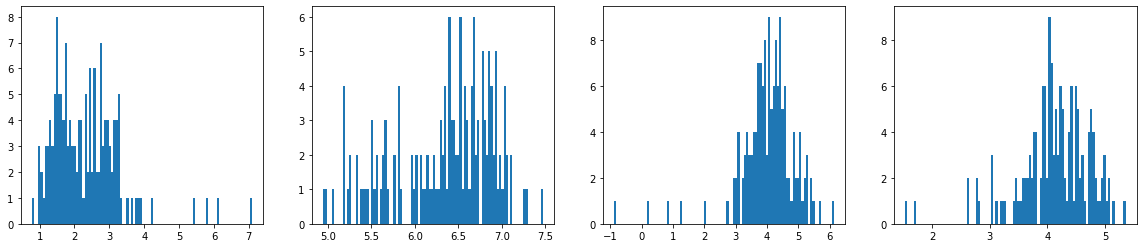

In [ ]:
bins=100
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
axs[0].hist(rf_ipsw_y0_test_ihdp, bins=bins)
axs[1].hist(rf_ipsw_y1_test_ihdp, bins=bins)
axs[2].hist(rf_ipsw_te_test_ihdp, bins=bins)
axs[3].hist(xl_ihdp_te_test_ihdp, bins=bins)
plt.show()

In [ ]:
#10-fold 
KFold2 = KFold(n_splits=10)
pipeline2 = make_pipeline(StandardScaler(),RandomForestRegressor())
kfold2 = KFold2.split(xt_ihdp, yf_ihdp.flatten())
scores2 = []
for k, (train, test) in enumerate(kfold2):
    pipeline2.fit(xt_ihdp[train], yf_ihdp[train].flatten())
    score2 = pipeline2.score(xt_ihdp[test], yf_ihdp[test].flatten())
    scores2.append(score2)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score2))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores2), np.std(scores2)))

Fold:  1, Accuracy: 0.806
Fold:  2, Accuracy: 0.659
Fold:  3, Accuracy: 0.782
Fold:  4, Accuracy: 0.781
Fold:  5, Accuracy: 0.660
Fold:  6, Accuracy: 0.714
Fold:  7, Accuracy: 0.756
Fold:  8, Accuracy: 0.752
Fold:  9, Accuracy: 0.667
Fold: 10, Accuracy: 0.739


Cross-Validation accuracy: 0.732 +/- 0.051


CATE

In [ ]:
from econml.dml import CausalForestDML
est = CausalForestDML(model_y='auto',model_t='auto')
est.fit(yf_ihdp_train.flatten(), t_ihdp_train, X=x_ihdp_train)
print(est.ate(X=x_ihdp_test))
print(est.score(yf_ihdp_test.flatten(), t_ihdp_test, X=x_ihdp_test))

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please

4.030357423253169
1.3758080402905912


Eveluation

In [ ]:
yf_flat = yf_ihdp_test.flatten()
t_flat = t_ihdp_test.flatten()
ite_flat = ite_ihdp_test.flatten()
ate_ihdp_rf = abs_ate(rf_te_ihdp_test,ite_flat)
ate_ihdp_ipsw = abs_ate(rf_ipsw_te_test_ihdp,ite_flat)
pehe_ihdp_rf = pehe(rf_te_ihdp_test,ite_flat)
pehe_ihdp_ipsw = pehe(rf_ipsw_te_test_ihdp,ite_flat)
att_jobs_rf = abs_att(rf_ipsw_te_test,y_jobs_test.flatten(),t_jobs_test.flatten(),e_jobs_test.flatten())
att_jobs_ipsw = abs_att(rf_te_jobs_test,y_jobs_test.flatten(),t_jobs_test.flatten(),e_jobs_test.flatten())
pr_jobs_rf = policy_risk(rf_ipsw_te_test,y_jobs_test.flatten(),t_jobs_test.flatten(),e_jobs_test.flatten())
pr_jobs_ipsw = policy_risk(rf_te_jobs_test,y_jobs_test.flatten(),t_jobs_test.flatten(),e_jobs_test.flatten())

In [ ]:
print(ate_ihdp_rf)
print(ate_ihdp_ipsw)
print(pehe_ihdp_rf)
print(pehe_ihdp_ipsw)

0.027251931976546295
0.1172262557814534
0.6062687620488627
0.6518912550657657


In [ ]:
print(att_jobs_rf)
print(att_jobs_ipsw)
print(pr_jobs_rf)
print(pr_jobs_ipsw)

0.15589034525145642
0.13543390919779813
0.3233918128654971
0.2706617808519982
